# EXPLORATION - NOT MAIN PORTFOLIO
# DATE: 5/2/26

# FINDINGS TO BE ADDED TO MAIN:
- severe imbalance fraud = 0.17% of data
- most fraud are micro transactions (amount 0-10)
- fraud transactions peaked at 2am-4am
- several v features show strong separation (V17, V14, V12)

# NOTES:
- tree or ensemble models are a must
- focus on precision & recall
- don't remove outliers, V features are already scaled (PCA) and amount can be engineered with log transform

# NOTEBOOK SUMMARY ON LAST CELL

### Initial EDA

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The features in the dataset are the result of PCA, not including Time and Amount. The target variable is the Class where 1 is fraud

In [3]:
data.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The only meaningful features are Time and Amount. Time is the time passed since the first transaction in second and amount is the transaction amount of each record

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

there are no null values. every data is float except for the class one

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


the features are already on the same scale, as a result of PCA of course, except for time and amount. These two needed some scaling. Time needs some engineering maybe we can split it into hour/day for more information just to be more useful. 

the amount feature specifically, the range of the min and max is very large 0 - 25k.

<Axes: >

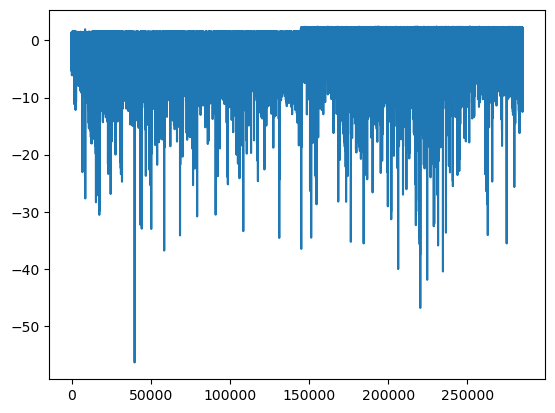

In [6]:
data.V1.plot()

<Axes: >

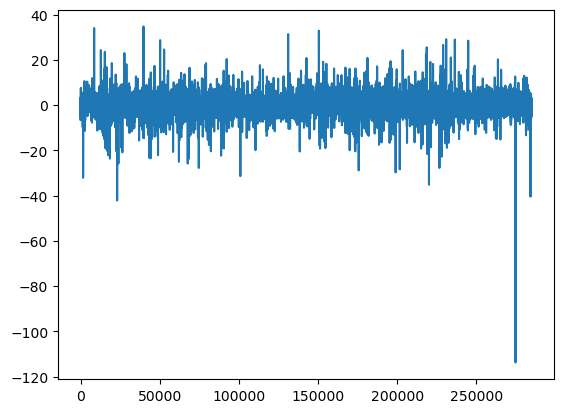

In [11]:
data.V5.plot()

<Axes: >

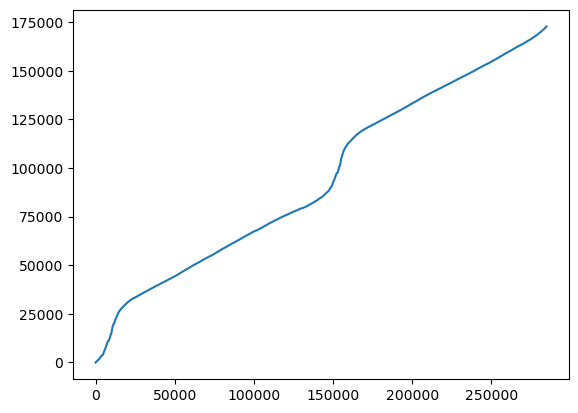

In [7]:
data.Time.plot()

<Axes: >

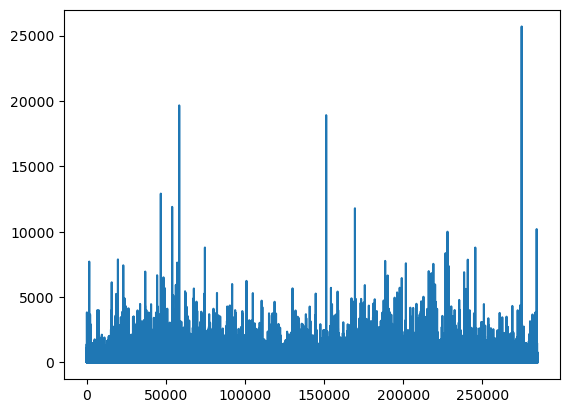

In [8]:
data.Amount.plot()

quick glance, there are definitely a lot of outliers

In [10]:
data.groupby('Class')['Amount'].agg(['mean','median','std','min','max'])

,mean,median,std,min,max
Class,,,,,
0,88.291022,22.00,250.105092,0.0,25691.16
1,122.211321,9.25,256.683288,0.0,2125.87


just from this, fraud data have larger transaction amount overall, but the distribution is quite similar looking at the deviation.

Large transaction amount actually comes from normal transaction not fraud. The highest on fraud is only 2k

maybe we can see the distribution for some information. visualize it for better clarity

In [13]:
import matplotlib.pyplot as plt

### Fraud Count

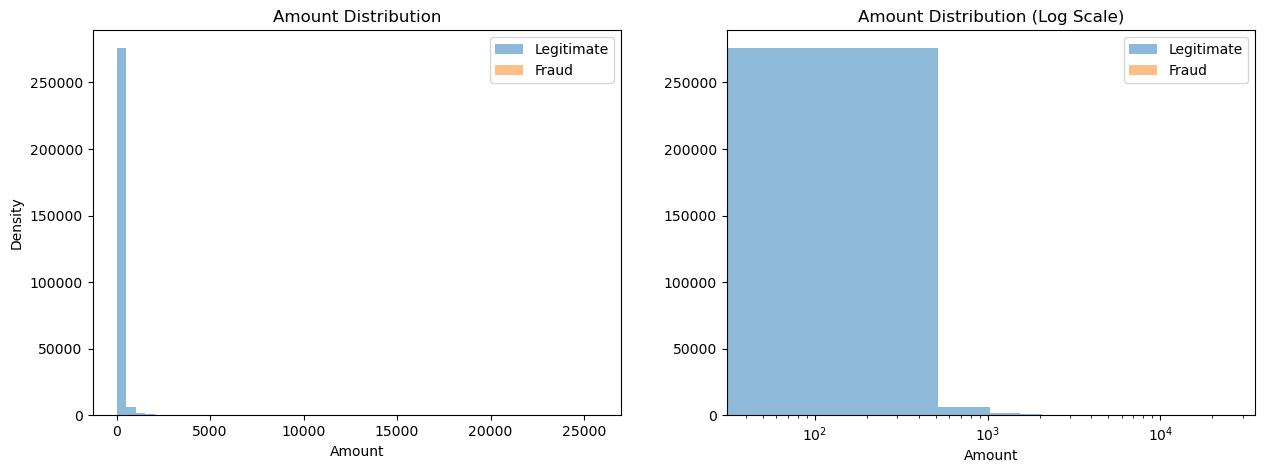

In [22]:
#comparing distribution
fig, axes = plt.subplots(1,2,figsize=(15,5))

#plot 1
axes[0].hist(data[data['Class']==0]['Amount'], bins = 50, alpha=0.5, label='Legitimate')
axes[0].hist(data[data['Class']==1]['Amount'], bins = 50, alpha=0.5, label='Fraud')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].set_title('Amount Distribution')

#plot 2: use log scale since the range is huge
axes[1].hist(data[data['Class']==0]['Amount'], bins = 50, alpha=0.5, label='Legitimate')
axes[1].hist(data[data['Class']==1]['Amount'], bins = 50, alpha=0.5, label='Fraud')
axes[1].set_xlabel('Amount')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].set_title('Amount Distribution (Log Scale)')
plt.show()

In [26]:
#create bins to segregate amount
amount_bins = [0, 10, 50, 100, 500, 1000, 25000]
data['amount_bin'] = pd.cut(data['Amount'], bins = amount_bins)

In [27]:
data.groupby('amount_bin')['Amount'].agg(['count','mean','median','std','min','max'])

C:\Users\Ben\AppData\Local\Temp\ipykernel_24520\4234519666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('amount_bin')['Amount'].agg(['count','mean','median','std','min','max'])


,count,mean,median,std,min,max
amount_bin,,,,,,
"(0, 10]",98439,3.960584,2.580,3.235288,0.01,10.00
"(10, 50]",90781,25.959312,23.660,11.781346,10.01,50.00
"(50, 100]",37254,73.297092,71.880,14.686627,50.01,100.00
"(100, 500]",47366,212.596131,179.425,100.667599,100.01,500.00
"(500, 1000]",6202,693.381743,663.180,142.268986,500.04,1000.00
"(1000, 25000]",2939,1799.802252,1435.000,1144.384755,1000.10,19656.53


In [36]:
#fraud distribution
fraud_dist = data[data['Class']==1].groupby('amount_bin').size()
fraud_dist

C:\Users\Ben\AppData\Local\Temp\ipykernel_24520\2692825490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_dist = data[data['Class']==1].groupby('amount_bin').size()


amount_bin
(0, 10]          222
(10, 50]          57
(50, 100]         56
(100, 500]        95
(500, 1000]       26
(1000, 25000]      9
dtype: int64

In [34]:
#dist percentage
fraud_dist/fraud_dist.sum()*100

amount_bin
(0, 10]          47.741935
(10, 50]         12.258065
(50, 100]        12.043011
(100, 500]       20.430108
(500, 1000]       5.591398
(1000, 25000]     1.935484
dtype: float64

In [32]:
len(data[data['Class']==1])/len(data) * 100

0.1727485630620034

first of all, this error is kind of annoying, main portfolio need to have observed=False on groupby to remove this

secondly, the data is distributed largely on 0-500, so even though there are some big amount in there, the histogram cant show much because it is clustered around the small amount

thirdly, the fraud have slightly similar distribution like the normal/legitimate one, most on the 0-10 and the big ones > 1000 is only 7% of all.

lastly, the fraud are so much smaller than the rest of the data, not even 0.2%

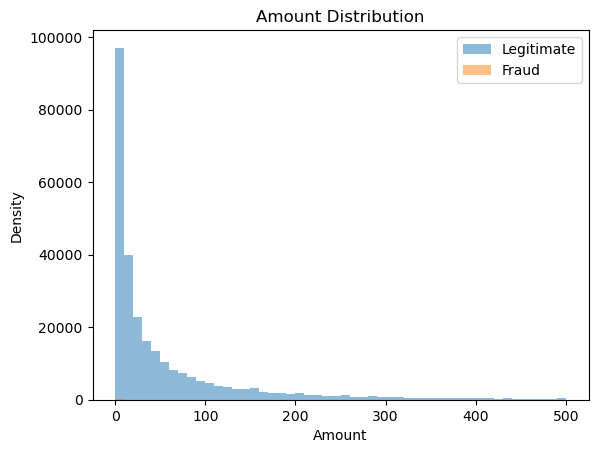

In [41]:
#try smaller amount for better visual
data_500 = data[data['Amount'] <= 500]

plt.hist(data_500[data_500['Class']==0]['Amount'], bins = 50, alpha=0.5, label='Legitimate')
plt.hist(data_500[data_500['Class']==1]['Amount'], bins = 50, alpha=0.5, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.title('Amount Distribution')
plt.show()

here we can clearly see, most transaction are from 0-50 amount. we still can't see the fraud because it is so small

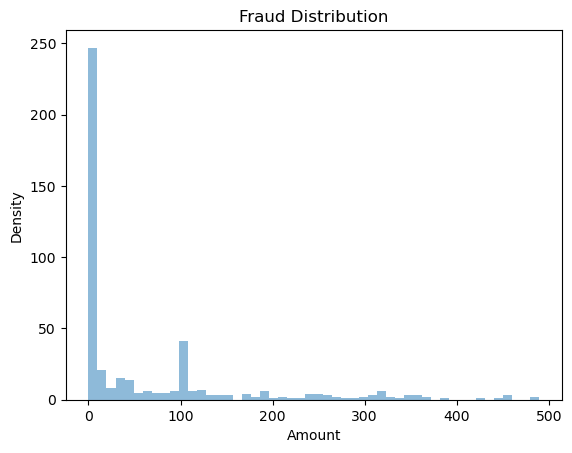

In [42]:
plt.hist(data_500[data_500['Class']==1]['Amount'], bins = 50, alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Fraud Distribution')
plt.show()

most of fraud are from 0-10 amount, but there are a spike on the 100 amount range.

logically this makes sense since the fraudsters maybe testing the stolen cards first with smaller transactions.

let's try some exploration on the time feature. 

In [52]:
data['hours_elapsed'] = data['Time']/3600

#collection period
print(f'Data spans over {data['hours_elapsed'].max():.1f} hours \
({data['hours_elapsed'].max()/24:.0f} days)')

Data spans over 48.0 hours (2 days)


we can see the distribution overtime

Text(0.5, 1.0, 'Fraud Rate Over Time')

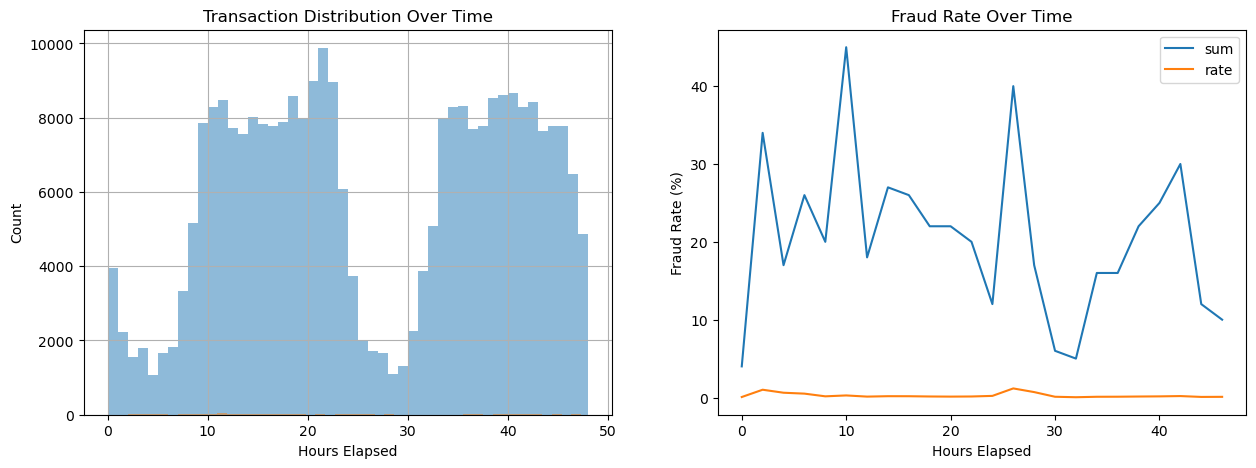

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data[data['Class']==0]['hours_elapsed'].hist(bins=48, alpha=0.5, label='Legitimate')
data[data['Class']==1]['hours_elapsed'].hist(bins=48, alpha=0.5, label='Fraud')
plt.xlabel('Hours Elapsed')
plt.ylabel('Count')
plt.title('Transaction Distribution Over Time')

plt.subplot(1,2,2)
data['hour_bin'] = (data['hours_elapsed'] // 2) * 2 #create 2 hour bins
fraud_rate = data.groupby('hour_bin')['Class'].agg(['sum', 'count'])
fraud_rate['rate'] = fraud_rate['sum']/fraud_rate['count'] * 100
fraud_rate[['sum', 'rate']].plot(ax=plt.gca())
plt.xlabel('Hours Elapsed')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate Over Time')

most transactions occured around hour 10-24 on each day

<Axes: xlabel='hour_bin'>

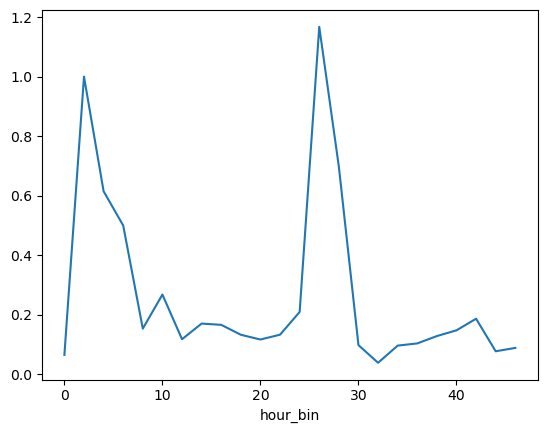

In [68]:
fraud_rate['rate'].plot()

In [71]:
fraud_rate.sort_values('rate', ascending=False)

,sum,count,rate
hour_bin,,,
26.0,40,3423,1.168566
2.0,34,3397,1.000883
28.0,17,2436,0.697865
4.0,17,2763,0.615273
6.0,26,5199,0.500096
10.0,45,16805,0.267777
24.0,12,5735,0.209241
42.0,30,16087,0.186486
14.0,27,15865,0.170186


for the fraud itself, quick glance we can see that it occur more in the morning with the highest happen on 2 am followed by 4am on both days

small conclusion, legitimate transaction happening on peak business hours from 10am all the way to 12am, while fraud activity shows a pattern with the highest rate occuring on 2am and 4 am on both days. These maybe suggests that fraudsters operate on off-peak hours so the cardholders are less likely to notice unauthorized charges immediately

### V features

In [77]:
v_features = data.iloc[:, 1:28].columns

In [80]:
fraud_means = data[data['Class']==1][v_features].mean()
legit_means = data[data['Class']==0][v_features].mean()

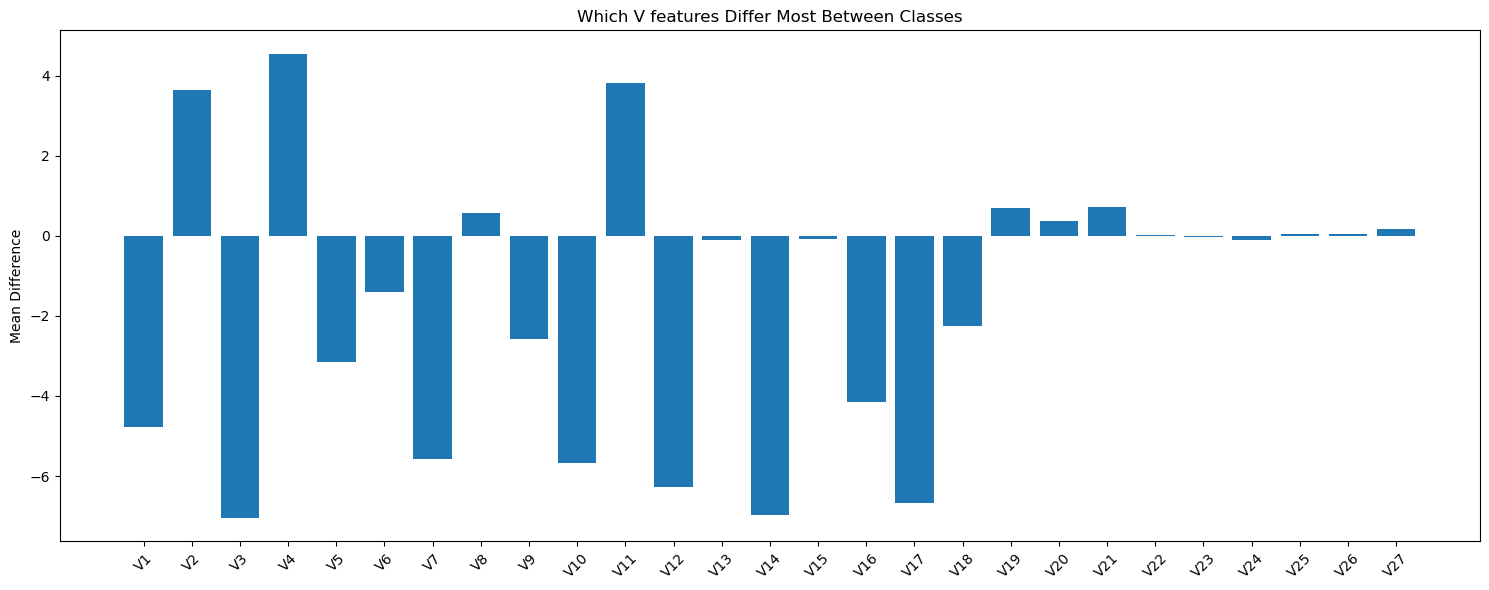

In [81]:
fig, ax = plt.subplots(figsize=(15,6))
x = range(len(v_features))
ax.bar(x, fraud_means - legit_means)
ax.set_xticks(x)
ax.set_xticklabels(v_features, rotation=45)
ax.set_ylabel('Mean Difference')
ax.set_title('Which V features Differ Most Between Classes')
plt.tight_layout()
plt.show()

In [88]:
diff = abs(fraud_means-legit_means)
top_features = diff.nlargest(10)
print("V features with largest mean:")
print(top_features)

V features with largest mean:
V3     7.045452
V14    6.983787
V17    6.677371
V12    6.270225
V10    5.686707
V7     5.578368
V1     4.780206
V4     4.549889
V16    4.147110
V11    3.806749
dtype: float64


most of the V features have high difference between classes which can be useful as it gives more information. but there are also some v features that are basically the same with similar mean or diff ~ 0, which we can probably discard later as it gives less information

In [110]:
low_importance = diff[diff < 0.5].index.tolist()
print("Candidate for removal")
print(low_importance)

Candidate for removal
['V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']


lets see the distribution as well

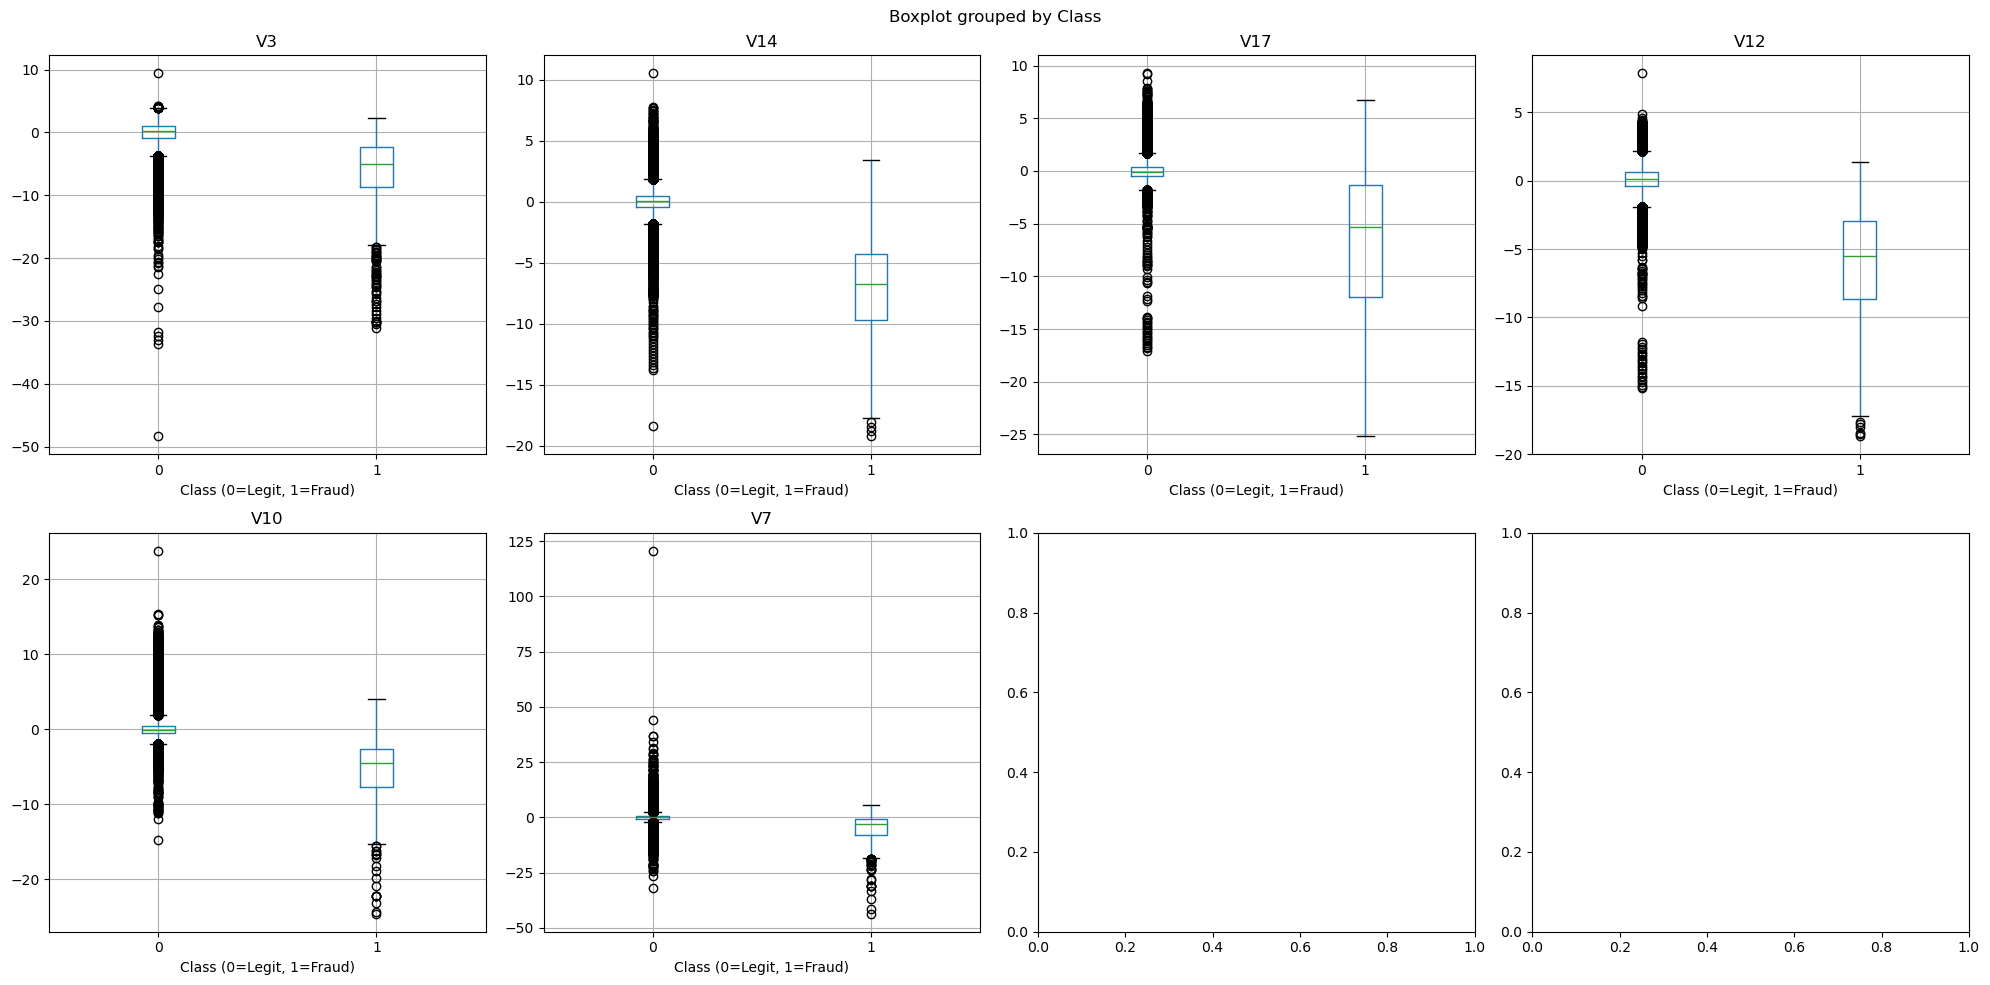

In [91]:
top_v = diff.nlargest(6).index.tolist()
features_to_plot = top_v

fig, axes = plt.subplots(2,4, figsize=(20,10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    data.boxplot(column=feature, by='Class', ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Class (0=Legit, 1=Fraud)')

plt.tight_layout()
plt.show()

just like before, the mean are already pretty different for these features indicating a good split. It is further shown from the box plot that the boxes don't overlap for these features, even though the legitimate one mostly outliers.

We can see that for fraud transaction, the V values mostly on the negative directions with a few on positive

### Correlation

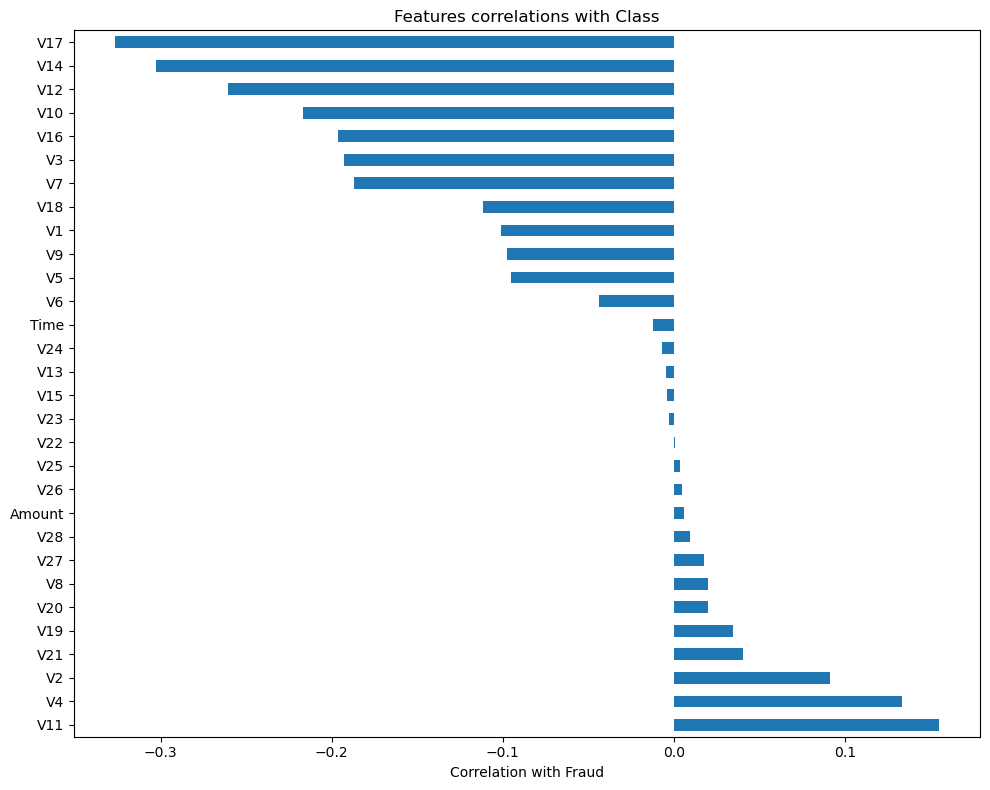

In [101]:
correlations = data.iloc[:,0:31].corr()['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10,8))
correlations.plot(kind='barh')
plt.xlabel('Correlation with Fraud')
plt.title('Features correlations with Class')
plt.tight_layout()
plt.show()

In [107]:
print('Positively correlated')
correlations.head()

Positively correlated


V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
Name: Class, dtype: float64

In [108]:
print("Negatively correlated")
correlations.tail()

Negatively correlated


V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64

In [109]:
correlations.mean()

-0.054245731245055516

Overall none of the correlations are that strong with fraud, the largest only 30% correlations. But we do see some features with stronger correlations like V17 and V14, also the features with the highest difference between classes analyzed before this

### Zero transactions

In [111]:
len(data[data['Amount']==0])

1825

In [112]:
len(data[data['Amount']==0])/len(data)

0.006407848121710491

In [114]:
data[data['Amount'] > 0]['Amount'].min()

0.01

In [116]:
len(data[(data['Amount']==0) & (data['Class']==1)])

27

there are not much data with 0 amount but there are several fraud transaction in them.

the lowest amount of transaction is 0.1 amount

## Summary
### Key Findings
#### Class Imbalance
- Fraud count only 0.17% of the data
- cannout use accuracy as metric, probably need precision or recall

#### Amount Feature
- range from 0 to 25k
- fraud have higher mean 122 than legitimate 88
- large transactions are mostly legitimate, max amount of fraud only 2k
- most transactions are under 500 amount, with heavy consentration on 0-50
- most fraud are in the 0-10 range
- **next:** amount need scaling, bin or log transform maybe better

#### Time feature
- data spans for 48 hours (2 days)
- legitimate transactions happens in peak hours, 10am ~ 12am
- fraud rate peaked in the morning, the highest at 2 - 4 am on both days
- **next:** need to create hour of day feature for further analysis

#### V features (PCA components)
- already scaled
- not one feature has strong correlation (max 0.32)
- top differentiating features between classes are V17, V14, V12, V10
- some features show clear separation while some are not
- **next:** better to remove feature with near 0 mean diff between fraud and legitimate

### ideas for feature engineering
- create an amount category, like small, medium, large, based on amount using bins of 0, 10, 50, 100, 500, 25000
- create another category using log transform for model comparison
- create time category like night, morning, afternoon, evening
- create is high risk hour flag, specifically to label 2am to 4am
- create is micro transaction flag (amount <10), since most fraud are micro transaction
- create two dataset, one has full V features and one with removed low diff for comparison
